# Introduction to Time Series Analysis with Python

*These are excerpts from DataCamp's course with the same title [[1]](#1). Many images were taken from capture of the slides from the course.*

A time series is a series of data points indexed (or listed or graphed) in time order (Wikipedia).

## Goals of the Course

1. Learn about time series models
2. Fit data to time series model
3. Use the models to make forecast of the future


# Concept: Correlation of Two Time Series

One way to learn about the relationship between two time series is to analyze their correlation. There are several ways to study the correlation:
- to plot the correlation visually
- to use Panda dataframe's **`corr()`** method
- to use linear regression

### Important: Calculate the Correlation of Their Returns, not the Level

When calculating correlation, always calculate the correlation **of the returns** rather than the actual level themselves, otherwise we will mistakenly get high correlation.

For example, here is the chart of Dow Jones Industrial Average and UFO sightings:

![DOW vs UFO Sightings](img/dow_vs_ufo.png)

The correlation between the levels: 0.94

Correlation of percent changes: ~0


### Using Scatter Plot

To use scatter plot to visualize correlation:

```
  plt.scatter(df['SPX_Ret'], df['R2000_Ret'])
  plt.show()
```


### Series `corr`

To use Pandas Series correlation method for Series:

```
correlation = df['SPX_Ret'].corr(df['R2000_Ret'])
print("Correlation is: ", correlation)
Correlation is: 0.868
```

### Simple Linear Regression of Time Series

A more sophisticated way is to use linear regression, a.k.a ordinary least square (OLS) method. 

A simple linear regression attempts to find the slope ($\beta$) and intercept ($\alpha$) of a line that best represents two time series $y_t$ and $x_t$:

$ y_t = \alpha + \beta x_t + \epsilon_t $

where:

- $y_t$: the dependent time series
- $x_t$: the independent time series
- $\alpha$: intercept
- $\beta$: slope
- $\epsilon_t$: white noise

There are many ways to perform linear regression on Python:

- In statsmodels:
  ```
    import statsmodels.api as sm
    sm.OLS(y, x).fit()
  ```
- In numpy:
  ```
    np.polyfit(x, y, deg=1)
  ```
- In pandas:
  ```
    pd.ols(y, x)
  ```
- In scipy:
  ```
    from scipy import stats
    stats.linregress(x, y)
  ```

Beware that the order of *y* and *x* parameters are not the same.

#### Relationship between R-Squared and Correlation

R-Squared (R<sup>2</sup>) is outputted by `sm.OLS()` function above, and it can be used to calculate the correlation as follows:
- [corr(x, y)]<sup>2</sup> = R<sup>2</sup> (or R-squared)
- the sign of the corr is the sign of regression slope (ie. sign of $\beta$)

Hence corr(x, y) = (+/- sign) $\sqrt { R-squared }$

# Concept: Autocorrelation (Serial Correlation)

Autocorrelation is the correlation of a time series with a lagged copy of itself. When the lag is not explicitly mentioned, autocorrelation often means the correlation with **lag-1** of itself.

### Positive and Negative Autocorrelation

With financial time series, when **returns** have **negative** autocorrelation, we say that it is **mean reverting** (ie. has the tendency to go back to the mean).

Alternatively, when the series has **positive** autocorrelation, we say it is **trend following**, or it has **momentum**.

There are actual trading strategies that exploit the fact that some stocks have 

### Panda's `autocorr`

Use Series's `autocorr` method to compute the autocorrelation:

```
df['Return'] = df['Price'].pct_change()
autocorrelation = df['Return'].autocorr()
```

Tip:
- resample the data to see autocorrelation on longer time frame:
  ```
    df = df.resample(rule='M', how='last')
  ```

## Autocorrelation Function

Autocorrelation Function (ACF) shows autocorrelation of different lags for a given time series. Any significant non-zero autocorrelation implies that the series can be forecast from the past.

### `plot_acf()` and `acf()` Functions
Use **`plot_acf()`** to plot ACF:

```
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x, lags=20, alpha=0.05)
```

where:
- x: the time series
- lags: how many lags to analyze
- alpha: width of confidence interval

Use **`acf()`** to get the ACF values:

```
from statsmodels.tsa.stattools import acf
print(acf(x))

[ 1. -0.6765505 0.34989905 -0.01629415 -0.02507013 0.01930354
-0.03186545 0.01399904 -0.03518128 0.02063168 -0.02620646 -0.00509828
...
0.07191516 -0.12211912 0.14514481 -0.09644228 0.05215882]

```

Note that ACF at lag=0 is always 1 of course.

### Example 1:

For example:
![Sample autocorrelation](img/autocorr1.png)

The shaded area represents the confidence interval. Hence is a autocorrelation value is outside this interval, it is significantly different than zero. The above ACF output implies that you can forecast the next value of the time series from the last two values, since the lag-1 and lag-2 are significantly different than zero.

### Example 2: ACF Plot for Cyclical Data

Example of ACF plot for revenue time series that shows strong cyclical trends:

![Sample autocorrelation](img/autocorr2.png)

The above shows significant autocorrelation at lags 4, 8, 12, 16, etc.

# Time Series Model: Random Walk

### White Noise

White noise is series with:
- constant mean
- constant variance
- zero autocorrelation at all lags

Special Case: if data has normal distribution, then it is *Gaussian White Noise*.

To generate 500 white noise samples with mean 0 and standard deviation 1:

In [1]:
import numpy as np
noise = np.random.normal(loc=0, scale=1, size=500)


### Random Walk

In random walk, Today's price = Yesterday's Price + Noise:

   $$ \large P_t = P_{t-1} + \epsilon_t $$

The change in price in random walk is just white noise!

   $$ \large P_t - P_{t-1} = \epsilon_t $$

Hence you can't forecast a random walk. The best guess for tomorrow's price is simply today's price.

### Generate Random Walk

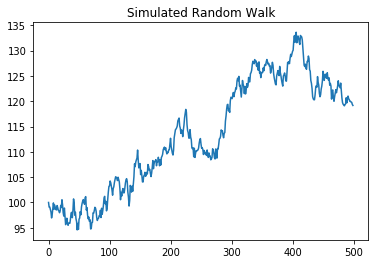

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Generate 500 random steps with mean=0 and standard deviation=1
whiteNoise = pd.Series(np.random.normal(loc=0, scale=1, size=500))

# Set first element to 0 so that the first price will be the starting stock price
whiteNoise[0]=0

# Simulate stock prices, P with a starting price of 100
randomWalk = 100 + whiteNoise.cumsum()

# Plot the simulated stock prices
plt.plot(randomWalk)
plt.title("Simulated Random Walk")
plt.show()

### Random Walk with Drift

In **random walk with drift**, prices on average drift by *μ* every period:

   $$ \large P_t = \mu + P_{t-1} + \epsilon_t $$
   
The change in price in random walk with drift is still white noise, but with mean of *μ*:

   $$ \large P_t - P_{t-1} = \mu + \epsilon_t $$

### Generate Random Walk with Drift

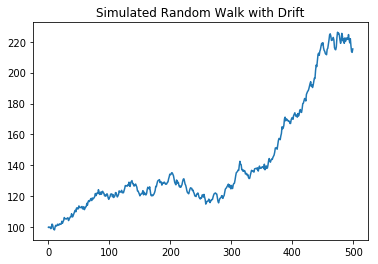

In [3]:
# Generate 500 random steps with mean 0.1% and standard deviation 1%,
# add one for total return
driftedWhiteNoise = pd.Series(np.random.normal(loc=0.001, scale=0.01, size=500) + 1)

# Set first element to 1
driftedWhiteNoise[0]=1

# Simulate the stock price, P, by taking the cumulative product
randomWalkWithDrift = 100 * driftedWhiteNoise.cumprod()

# Plot the simulated stock prices
plt.plot(randomWalkWithDrift)
plt.title("Simulated Random Walk with Drift")
plt.show()



### Statistical Test for Random Walk

Perform regression test for random walk:

   $$ \large P_t = \alpha + \beta P_{t-1} + \epsilon_t $$

Test:
- H<sub>0</sub>: β = 1 (random walk)
- H<sub>1</sub>: β < 1 (not random walk)

Or equivalently test on the returns instead:

   $$ \large P_t - P_{t-1} = \alpha + \beta P_{t-1} + \epsilon_t $$

Test:
- H<sub>0</sub>: β = 0 (random walk)
- H<sub>1</sub>: β < 0 (not random walk)

The second form of the test is called **Dickey-Fuller** test. If you add more lagged changes on the right hand side, it is called **Augmented Dickey-Fuller** test.

See [this page](https://www.real-statistics.com/time-series-analysis/stochastic-processes/dickey-fuller-test/) for more theoretical info.

### ADF Test in Python


In [4]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(randomWalk)

The main output to get is the p-value of the test:

In [5]:
print(results[1])

0.6235636128300193


The null hypothesis is that the series **is** a random walk. If p-value is < 0.05, than we can reject the hypothesis that the series is a random walk with 95% confidence.

So in this example, we cannot reject the null hypothesis that the series is a random walk. Thus the series **is** likely a random walk.

# Concept: Stationarity

There are different ways to define stationarity:
- **Strong stationarity**: the the strictest sense, it means the entire distribution of data is time-invariant
- **Weak stationarity**: this is the one that is easier to test, it means mean, variance and autocorrelation are time-invariant (i.e., for autocorrelation, $corr\large (X_t, X_{t-\tau})$ is only a function of $\large \tau$, and not a function of time)

Stationarity is important because if the process is not stationary, it becomes difficult to model, because the parameters that we would like to estimate change over time.

Common types of **non-stationary** series:
- random walk
- series with seasonality


### Testing for Stationarity in Python

In [32]:
def check_for_stationarity(X, cutoff=0.05):
    pvalue = adfuller(X)[1]
    print('p-value = %.5f. The series is likely %s.' % (pvalue, 'stationary' if pvalue < cutoff else 'non-stationary'))

In [7]:
_ = check_for_stationarity(randomWalk)

p-value = 0.62356. The series is likely non-stationary.


### Transforming Non-Stationary Series into Stationary Series

- by taking the first difference:

In [8]:
_ = check_for_stationarity(randomWalk.diff().dropna())

p-value = 0.00000. The series is likely stationary.


- by taking seasonal difference:

```
revenue.diff(4)
```
- by converting returns to log returns:
```
np.log(price)
```
- combination of above

# Time Series Model: Auto Regressive (AR) Model

In auto-regressive or AR model, today's value is equal to mean *μ* plus fraction $\phi$ (*phi*) of yesterday's value plus noise. 

Formal definition:

$$ \large R_t = \mu + \phi R_{t-1} + \epsilon_t $$

Since there is only one lagged value on the right hand side, this is called **AR model of order 1**, or simply an **AR(1) model**.

If the AR parameter *phi* is 1, the process is a random walk. If *phi* is zero, the process is a white noise.

In order for the process to be stable and stationary: $-1 < \phi < 1$.

### Interpretation of AR(1) Parameter

When the time series represents returns:

$$ R_t = \mu + \phi R_{t-1} + \epsilon_t $$

the interpretation is:
- $\phi$ is negative: Mean Reversion
- $\phi$ is positive: Momentum

### Simulating an AR Process

Note about the `ar` parameter:
- must add `1` constant (for the zero-lagged $\phi$ coefficient)
- the sign of $\phi$ parameter is the opposite of what we've been using

So to generate AR(1) time series with $\phi=0.9$:

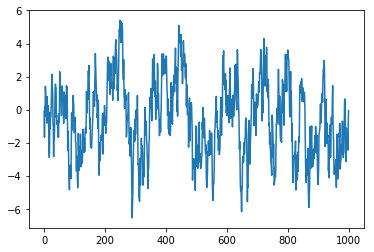

In [9]:
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1, -0.9])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulatedAR1_09 = AR_object.generate_sample(nsample=1000)
_ = plt.plot(simulatedAR1_09)

To generate AR(1) time series with $\phi = -0.9$:

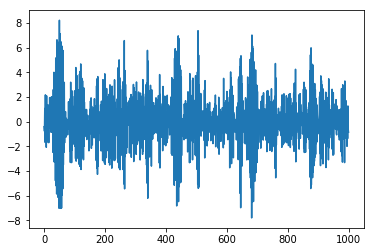

In [10]:
ar = np.array([1, 0.9])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulatedAR1_Min09 = AR_object.generate_sample(nsample=1000)
_ = plt.plot(simulatedAR1_Min09)

### Comparison of AR(1) Autocorrelation Functions

For AR(1) process with $\phi = 0.9$:

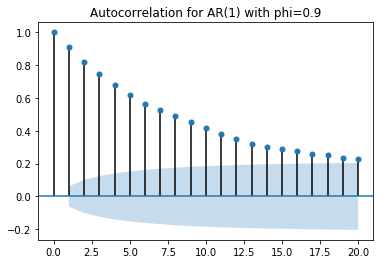

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
_ = plot_acf(simulatedAR1_09, lags=20, alpha=0.05, title='Autocorrelation for AR(1) with phi=0.9')

For AR(1) with $\phi = -0.9$:

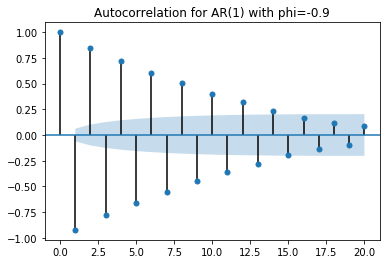

In [12]:
_ = plot_acf(simulatedAR1_Min09, lags=20, alpha=0.05, title='Autocorrelation for AR(1) with phi=-0.9')

Note that the autocorrelation decays exponentially at the rate of $\phi$. Therefore if $\phi$ is 0.9, the lag-1 autocorrelation is 0.9, the lag-2 autocorrelation is $0.9^2$, the lag-3 autocorrelation is $0.9^3$, and so on.

With negative $\phi$, the autocorrelation still decays exponentially, but the sign reverses on each lag.

### Higher Order AR Models

#### AR(2)

$$ \large R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \epsilon_t $$

#### AR(3)

$$ \large R_t = \mu + \phi_1 R_{t-1} + \phi_2 R_{t-2} + \phi_3 R_{t-3} + \epsilon_t $$

#### ...

### Estimating AR Model

Given a time series that (we suspect) is coming from an AR process, we can estimate the parameters as follows.

In [13]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulatedAR1_09, order=(1,0))
result = mod.fit()

The `order` parameter contains the order of AR and the order of MA (to be discussed later).

To see the estimated parameters $\mu$ and $\phi$:

In [14]:
print('mu=%f, phi=%f' % (result.params[0], result.params[1]))

mu=-0.543471, phi=0.907558


For the other simulated data:

In [15]:
mod = ARMA(simulatedAR1_Min09, order=(1,0))
result = mod.fit()
print('mu=%f, phi=%f' % (result.params[0], result.params[1]))

mu=-0.001818, phi=-0.922847


More detailed information is available in `summary()`:

In [16]:
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1385.936
Method:                       css-mle   S.D. of innovations              0.967
Date:                Tue, 15 Jan 2019   AIC                           2777.871
Time:                        04:42:34   BIC                           2792.595
Sample:                             0   HQIC                          2783.467
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.016     -0.114      0.909      -0.033       0.029
ar.L1.y       -0.9228      0.012    -76.633      0.000      -0.946      -0.899
                                    Roots           

### Forecasting an AR Model

We can forecast both in-sample and out-of-sample from an AR model.

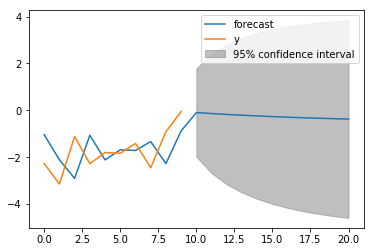

In [17]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulatedAR1_09, order=(1,0))
result = mod.fit()
result.plot_predict(start=len(simulatedAR1_09)-10, end=len(simulatedAR1_09)+10)
plt.show()

The graph above shows both in-sample and out-of-sample prediction of the model. For the out-of-sample prediction, the confidence interval is shown. Note that this interval gets wider with more prediction.

### Identifying the Order of an AR Model

In practice, the order of an AR model is usually not known.

There are two ways to identify the order of an AR model:
- using **Partial Autocorrelation Function**
- using **Information criteria**: adjusts goodness-of-fit for number of parameters. There are two popular adjusted goodness-of-fit meaures:
  - AIC (Akaike Information Criterion)
  - BIC (Bayesian Information Criterion)

Let's generate some AR(n) samples to demonstrate how to perform the two methods above. We already have sample AR(1) data in `simulatedAR1_09`.


In [18]:
# AR(2)
AR_object2= ArmaProcess(np.array([1, -0.6, -0.3]), np.array([1]))
simulatedAR2 = AR_object2.generate_sample(nsample=1000)
# AR(3)
AR_object3 = ArmaProcess(np.array([1, -0.6, 0.5, -0.3]), np.array([1]))
simulatedAR3 = AR_object3.generate_sample(nsample=1000)

#### Using PACF

PACF for AR(1) with $\phi=0.9$:

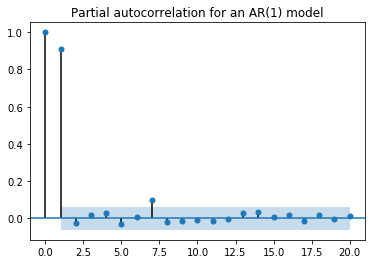

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
_ = plot_pacf(simulatedAR1_09, lags= 20, alpha=0.05, title='Partial autocorrelation for an AR(1) model')

PACF for an AR(2) model with $\phi_1=0.6$, $\phi_2=0.3$:

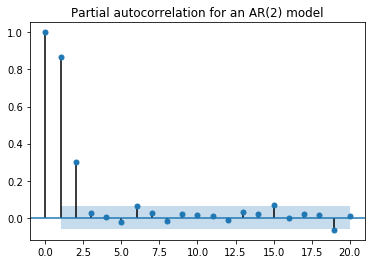

In [20]:
_ = plot_pacf(simulatedAR2, lags=20, alpha=0.05, title='Partial autocorrelation for an AR(2) model')

PACF for an AR(3) model with , $\phi_1=0.6$, $\phi_2=-0.5$, $\phi_3=0.3$:

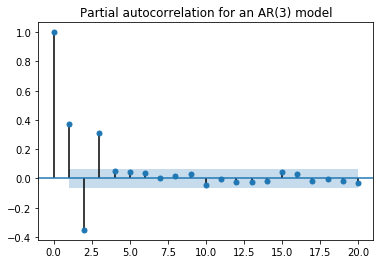

In [21]:
_ = plot_pacf(simulatedAR3, lags= 20, alpha=0.05, title='Partial autocorrelation for an AR(3) model')

PACF for a white noise time series:

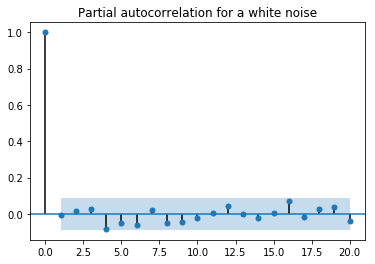

In [22]:
_ = plot_pacf(whiteNoise, lags= 20, alpha=0.05, title='Partial autocorrelation for a white noise')

#### Using Information Criteria

For example, let's use information criteria to estimate the order of an AR(2) model from simulated data above.

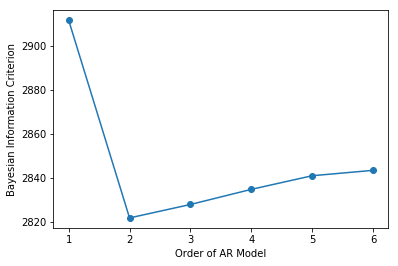

In [23]:
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulatedAR2, order=(p,0))
    res = mod.fit()
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

The correct order is the order with lowest BIC value, ie. in this case is correctly **2**.

# Time Series Model: Moving Average (MA) Model

In moving average or MA model, today's value is equal to mean, plus noise, plus a fraction theta of yesterday's noise.

Mathematical description of MA model of order 1 (or simply called MA(1) model) is as follows:

$$ \large R_t = \mu + \epsilon_t + \theta \ \epsilon_{t-1} $$

The MA parameter is $\theta$ (theta). If $\theta=0$, then the process is white noise.

MA model is stationary for all values of $\theta$.

### Interpretation of MA(1) Parameter

Suppose R<sub>t</sub> is stock returns, then θ (*theta*) can be interpreted as follows:
- Negative θ: One-Period Mean Reversion
- Positive θ: One-Period Momentum

Note: One-period autocorrelation is $ {\theta} \  / \ {(1 + \theta^2)}$, not θ

### Higher Order MA Models
MA(1):
$$ \large R_t = \mu + \epsilon_t + \theta_1 \ \epsilon_{t-1} $$

MA(2):

$$ \large R_t = \mu + \epsilon_t + \theta_1 \ \epsilon_{t-1} + \theta_2 \ \epsilon_{t-2} $$

MA(3):

$$ \large R_t = \mu + \epsilon_t + \theta_1 \ \epsilon_{t-1} + \theta_2 \ \epsilon_{t-2} + \theta_3 \ \epsilon_{t-3} $$


### Simulating an MA Process

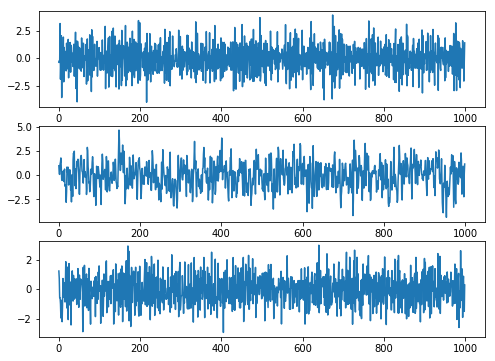

In [24]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

plt.figure(figsize=(8,6))

# Plot 1: MA parameter = -0.9
plt.subplot(3,1,1)
ar1a = np.array([1])
ma1a = np.array([1, -0.9])
MA_object1a = ArmaProcess(ar1a, ma1a)
simulatedMa1a = MA_object1a.generate_sample(nsample=1000)
plt.plot(simulatedMa1a)

# Plot 2: MA parameter = +0.9
plt.subplot(3,1,2)
ar1b = np.array([1])
ma1b = np.array([1, 0.9])
MA_object1b = ArmaProcess(ar1b, ma1b)
simulatedMa1b = MA_object1b.generate_sample(nsample=1000)
plt.plot(simulatedMa1b)

# Plot 3: MA parameter = -0.3
plt.subplot(3,1,3)
ar1c = np.array([1])
ma1c = np.array([1, -0.3])
MA_object1c = ArmaProcess(ar1c, ma1c)
simulatedMa1c = MA_object1c.generate_sample(nsample=1000)
plt.plot(simulatedMa1c)

plt.show()

### Autocorrelation Function (ACF) for Several MA Time Series

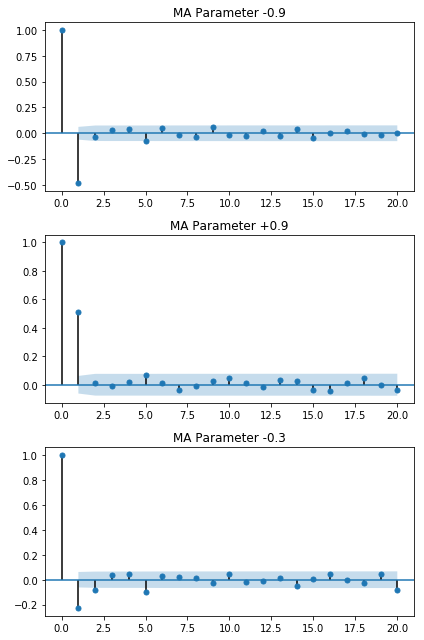

In [25]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot three ACF on same page for comparison using subplots
#plt.figure(figsize=(6,9))
fig, axes = plt.subplots(3,1,figsize=(6,9))

# Plot 1: AR parameter = -0.9
plot_acf(simulatedMa1a, lags=20, ax=axes[0])
axes[0].set_title("MA Parameter -0.9")

# Plot 2: AR parameter = +0.9
plot_acf(simulatedMa1b, lags=20, ax=axes[1])
axes[1].set_title("MA Parameter +0.9")

# Plot 3: AR parameter = -0.3
plot_acf(simulatedMa1c, lags=20, ax=axes[2])
axes[2].set_title("MA Parameter -0.3")

plt.tight_layout()
plt.show()

Once again, one-period autocorrelation is $ {\theta} \  / \ {(1 + \theta^2)}$, not θ

### Estimating an MA Model

Same as simulating AR model previously

In [26]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulatedMa1a, order=(0,1))
result = mod.fit()

Remember that the simulated data was generated with $\theta = -0.9$. Let's see the estimate for the constant and $\theta$:

In [27]:
print(result.params)

[-0.00218702 -0.87257056]


In [28]:
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1403.060
Method:                       css-mle   S.D. of innovations              0.984
Date:                Tue, 15 Jan 2019   AIC                           2812.119
Time:                        04:42:37   BIC                           2826.843
Sample:                             0   HQIC                          2817.715
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.004     -0.548      0.584      -0.010       0.006
ma.L1.y       -0.8726      0.015    -57.672      0.000      -0.902      -0.843
                                    Roots           

### Forecasting an MA Model

Also is similar to forecasting AR model previously.

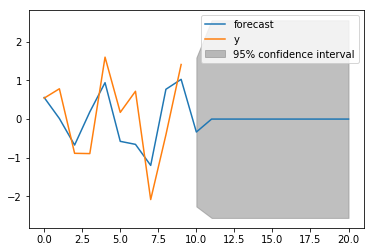

In [30]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(simulatedMa1a, order=(0,1))
res = mod.fit()
res.plot_predict(start=len(simulatedMa1a)-10, end=len(simulatedMa1a)+10)
plt.show()

Note that with MA(1) model, unlike AR model, all forecast beyond one step ahead forecast will be the same.

# Time Series Model: ARMA Model

ARMA model is a combination of AR model and MA model.

This is the formula for ARMA(1,1) model:

$$ \large R_t = \mu + \phi \ R_{t-1} + \epsilon_t + \theta \ \epsilon_{t-1} $$

# Cointegration Models

The idea behind cointegration is that even if two time series $P_t$ and $Q_t$ are random walks, the linear combination $P_t - c Q_t$ may not be a random walk. If that's true, then even though $P_t$ and $Q_t$ are not forecastable, because they are random walks, the linear combination $P_t - c Q_t$ is forecastable.

This [paper (PDF)](http://faculty.wwu.edu/kriegj/Econ470/A%20drunk%20and%20her%20dog.pdf) explains cointegration by making an analogy to a drunk woman and her dog.

### What Types of Series are Cointegrated

- Economic substitutes:
  - Heating Oil and Natural Gas
  - Platinum and Paladium
  - Corn and Wheat
  - Corn and Sugar
  - ...
  - Bitcoin and Ethereum?

### Testing for Cointegration

- Regress $P_t$ on $Q_t$ and get the slope $c$
- Run Augmented Dickey-Fuller test on $P_t - c Q_t$ to test for random walk. If it's **not** a random walk, then the series are cointegrated.

Alternatively, use `coint()` function:

```
from statsmodels.tsa.stattools import coint
coint(P,Q)
```

# Putting It All Together

With the knowledge that we studied above, the common usage is to predict future value of a time series based on a model that we think matches the time series. Sample steps to do this are as follows:
- Test for Random Walk
- Take first differences
- Compute ACF and PACF
- Fit a few AR, MA, and ARMA models
- Use Information Criterion to choose best model
- Forecast the time series

# Advanced Topics

- GARCH Models
- Nonlinear Models
- Multivariate Time Series Models
- Regime Switching Models
- State Space Models and Kalman Filtering

# References

1. <A name="1">[DataCamp course: Introduction to Time Series Analysis in Python](https://www.datacamp.com/courses/introduction-to-time-series-analysis-in-python). Link to slides (PDF): [1](https://s3.amazonaws.com/assets.datacamp.com/production/course_4267/slides/chapter1.pdf), [2](https://s3.amazonaws.com/assets.datacamp.com/production/course_4267/slides/chapter2.pdf), [3](https://s3.amazonaws.com/assets.datacamp.com/production/course_4267/slides/chapter3.pdf), [4](https://s3.amazonaws.com/assets.datacamp.com/production/course_4267/slides/chapter4.pdf), [5](https://s3.amazonaws.com/assets.datacamp.com/production/course_4267/slides/chapter5.pdf)